In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
# dataset = 'model/keypoint_classifier/keypoint.csv'
dataset = 'model/keypoint_classifier/keypoint_model_one.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_model_one.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier_model_one.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 7

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/35 [..............................] - ETA: 20s - loss: 2.0356 - accuracy: 0.1641
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 1s 6ms/step - loss: 1.9130 - accuracy: 0.1906 - val_loss: 1.7782 - val_accuracy: 0.2648
Epoch 2/1000
 1/35 [..............................] - ETA: 0s - loss: 1.8412 - accuracy: 0.2344
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 1.7663 - accuracy: 0.2758 - val_loss: 1.6619 - val_accuracy: 0.2911
Epoch 3/1000
 1/35 [..............................] - ETA: 0s - loss: 1.7706 - accuracy: 0.2422
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 1.6776 - accuracy: 0.2971 - val_loss: 1.5774 - val_accuracy: 0.3059
Epoch 4/1000
 1/35 [..............................] - ETA: 0s - lo

 1/35 [..............................] - ETA: 0s - loss: 1.0603 - accuracy: 0.5625
Epoch 27: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 1.0272 - accuracy: 0.5947 - val_loss: 0.7102 - val_accuracy: 0.8133
Epoch 28/1000
 1/35 [..............................] - ETA: 0s - loss: 1.0479 - accuracy: 0.5938
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 1.0180 - accuracy: 0.5997 - val_loss: 0.7021 - val_accuracy: 0.8160
Epoch 29/1000
 1/35 [..............................] - ETA: 0s - loss: 1.0196 - accuracy: 0.6094
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.9862 - accuracy: 0.6154 - val_loss: 0.6865 - val_accuracy: 0.8160
Epoch 30/1000
 1/35 [..............................] - ETA: 0s - loss: 0.95

 1/35 [..............................] - ETA: 0s - loss: 0.9181 - accuracy: 0.7266
Epoch 53: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.8716 - accuracy: 0.6581 - val_loss: 0.5435 - val_accuracy: 0.8450
Epoch 54/1000
 1/35 [..............................] - ETA: 0s - loss: 0.9237 - accuracy: 0.6172
Epoch 54: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.8668 - accuracy: 0.6579 - val_loss: 0.5464 - val_accuracy: 0.8464
Epoch 55/1000
 1/35 [..............................] - ETA: 0s - loss: 0.8787 - accuracy: 0.6172
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.8671 - accuracy: 0.6604 - val_loss: 0.5398 - val_accuracy: 0.8477
Epoch 56/1000
 1/35 [..............................] - ETA: 0s - loss: 0.78

 1/35 [..............................] - ETA: 0s - loss: 0.8540 - accuracy: 0.6797
Epoch 79: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.8110 - accuracy: 0.6781 - val_loss: 0.4808 - val_accuracy: 0.8619
Epoch 80/1000
 1/35 [..............................] - ETA: 0s - loss: 0.7468 - accuracy: 0.6562
Epoch 80: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.8119 - accuracy: 0.6788 - val_loss: 0.4769 - val_accuracy: 0.8592
Epoch 81/1000
 1/35 [..............................] - ETA: 0s - loss: 0.8214 - accuracy: 0.7031
Epoch 81: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.8024 - accuracy: 0.6822 - val_loss: 0.4742 - val_accuracy: 0.8632
Epoch 82/1000
 1/35 [..............................] - ETA: 0s - loss: 0.75

 1/35 [..............................] - ETA: 0s - loss: 0.7868 - accuracy: 0.6953
Epoch 105: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7781 - accuracy: 0.6999 - val_loss: 0.4324 - val_accuracy: 0.8848
Epoch 106/1000
 1/35 [..............................] - ETA: 0s - loss: 0.8296 - accuracy: 0.7031
Epoch 106: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.8042 - accuracy: 0.6804 - val_loss: 0.4442 - val_accuracy: 0.8774
Epoch 107/1000
 1/35 [..............................] - ETA: 0s - loss: 0.6880 - accuracy: 0.7578
Epoch 107: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7598 - accuracy: 0.6997 - val_loss: 0.4366 - val_accuracy: 0.8821
Epoch 108/1000
 1/35 [..............................] - ETA: 0s - loss

 1/35 [..............................] - ETA: 0s - loss: 0.7088 - accuracy: 0.7031
Epoch 131: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7608 - accuracy: 0.7033 - val_loss: 0.4036 - val_accuracy: 0.8922
Epoch 132/1000
 1/35 [..............................] - ETA: 0s - loss: 0.7922 - accuracy: 0.7109
Epoch 132: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7604 - accuracy: 0.7056 - val_loss: 0.4107 - val_accuracy: 0.8854
Epoch 133/1000
 1/35 [..............................] - ETA: 0s - loss: 0.8425 - accuracy: 0.7031
Epoch 133: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7701 - accuracy: 0.6939 - val_loss: 0.4038 - val_accuracy: 0.8949
Epoch 134/1000
 1/35 [..............................] - ETA: 0s - loss

 1/35 [..............................] - ETA: 0s - loss: 0.6987 - accuracy: 0.7422
Epoch 157: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7558 - accuracy: 0.7078 - val_loss: 0.3881 - val_accuracy: 0.8935
Epoch 158/1000
 1/35 [..............................] - ETA: 0s - loss: 0.6058 - accuracy: 0.7734
Epoch 158: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.7172 - val_loss: 0.3826 - val_accuracy: 0.8908
Epoch 159/1000
 1/35 [..............................] - ETA: 0s - loss: 0.7514 - accuracy: 0.6953
Epoch 159: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7508 - accuracy: 0.7004 - val_loss: 0.3915 - val_accuracy: 0.8875
Epoch 160/1000
 1/35 [..............................] - ETA: 0s - loss

 1/35 [..............................] - ETA: 0s - loss: 0.7561 - accuracy: 0.6641
Epoch 183: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7226 - accuracy: 0.7114 - val_loss: 0.3667 - val_accuracy: 0.8996
Epoch 184/1000
 1/35 [..............................] - ETA: 0s - loss: 0.6783 - accuracy: 0.7656
Epoch 184: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.7298 - val_loss: 0.3604 - val_accuracy: 0.9003
Epoch 185/1000
 1/35 [..............................] - ETA: 0s - loss: 0.8220 - accuracy: 0.6641
Epoch 185: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7238 - accuracy: 0.7141 - val_loss: 0.3621 - val_accuracy: 0.8962
Epoch 186/1000
 1/35 [..............................] - ETA: 0s - loss

 1/35 [..............................] - ETA: 0s - loss: 0.6399 - accuracy: 0.7266
Epoch 209: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7190 - accuracy: 0.7213 - val_loss: 0.3562 - val_accuracy: 0.9225
Epoch 210/1000
 1/35 [..............................] - ETA: 0s - loss: 0.7469 - accuracy: 0.7500
Epoch 210: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7121 - accuracy: 0.7240 - val_loss: 0.3573 - val_accuracy: 0.9124
Epoch 211/1000
 1/35 [..............................] - ETA: 0s - loss: 0.6828 - accuracy: 0.7109
Epoch 211: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7378 - accuracy: 0.7132 - val_loss: 0.3471 - val_accuracy: 0.9360
Epoch 212/1000
 1/35 [..............................] - ETA: 0s - loss

 1/35 [..............................] - ETA: 0s - loss: 0.6772 - accuracy: 0.7578
Epoch 235: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.7224 - val_loss: 0.3525 - val_accuracy: 0.9036
Epoch 236/1000
 1/35 [..............................] - ETA: 0s - loss: 0.7053 - accuracy: 0.7578
Epoch 236: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.7238 - val_loss: 0.3459 - val_accuracy: 0.9434
Epoch 237/1000
 1/35 [..............................] - ETA: 0s - loss: 0.6996 - accuracy: 0.6953
Epoch 237: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7191 - accuracy: 0.7249 - val_loss: 0.3455 - val_accuracy: 0.9441
Epoch 238/1000
 1/35 [..............................] - ETA: 0s - loss

 1/35 [..............................] - ETA: 0s - loss: 0.7143 - accuracy: 0.7422
Epoch 261: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.7341 - val_loss: 0.3368 - val_accuracy: 0.9441
Epoch 262/1000
 1/35 [..............................] - ETA: 0s - loss: 0.6171 - accuracy: 0.7891
Epoch 262: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.7260 - val_loss: 0.3359 - val_accuracy: 0.9535
Epoch 263/1000
 1/35 [..............................] - ETA: 0s - loss: 0.5648 - accuracy: 0.7969
Epoch 263: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.7339 - val_loss: 0.3384 - val_accuracy: 0.9434
Epoch 264/1000
 1/35 [..............................] - ETA: 0s - loss

 1/35 [..............................] - ETA: 0s - loss: 0.7661 - accuracy: 0.7109
Epoch 287: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.7435 - val_loss: 0.3289 - val_accuracy: 0.9400
Epoch 288/1000
 1/35 [..............................] - ETA: 0s - loss: 0.6612 - accuracy: 0.7500
Epoch 288: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7068 - accuracy: 0.7220 - val_loss: 0.3260 - val_accuracy: 0.9522
Epoch 289/1000
 1/35 [..............................] - ETA: 0s - loss: 0.6660 - accuracy: 0.7578
Epoch 289: saving model to model/keypoint_classifier\keypoint_classifier_model_one.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.7251 - val_loss: 0.3332 - val_accuracy: 0.9495
Epoch 290/1000
 1/35 [..............................] - ETA: 0s - loss

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 913us/step - loss: 0.3312 - accuracy: 0.9454


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 61ms/step
[4.4869643e-02 4.0102050e-01 1.6400166e-02 3.2137740e-01 1.0041983e-08
 1.9464571e-06 2.1633026e-01]
1


# Confusion matrix

47/47 [==============================] - 0s 633us/step


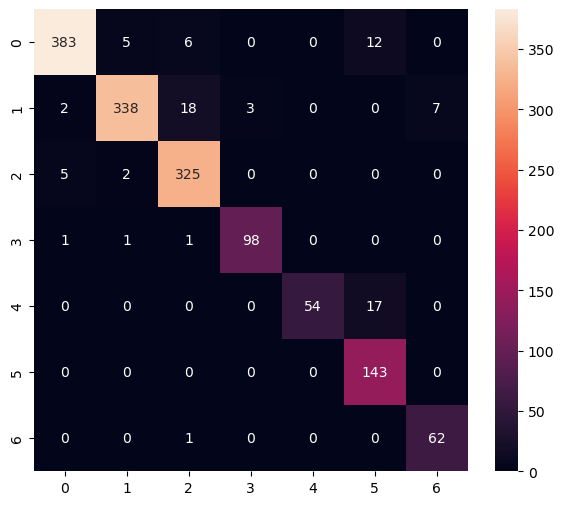

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       406
           1       0.98      0.92      0.95       368
           2       0.93      0.98      0.95       332
           3       0.97      0.97      0.97       101
           4       1.00      0.76      0.86        71
           5       0.83      1.00      0.91       143
           6       0.90      0.98      0.94        63

    accuracy                           0.95      1484
   macro avg       0.94      0.94      0.93      1484
weighted avg       0.95      0.95      0.95      1484



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Hylte\AppData\Local\Temp\tmpepgk7t3g\assets


INFO:tensorflow:Assets written to: C:\Users\Hylte\AppData\Local\Temp\tmpepgk7t3g\assets


6676

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.4869658e-02 4.0102068e-01 1.6400168e-02 3.2137722e-01 1.0041949e-08
 1.9464508e-06 2.1633036e-01]
1
